<a href="https://colab.research.google.com/github/Akhil4Coding/Data_Project/blob/Akhil4Coding-Individual_Final_Complete/BNM832_BD_210223372_INDVIDUAL_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASUALTY SEVERITY PREDICTION IN ACCIDENT USING MACHINE LEARNING**

#### **Candidate Number** : 334636

### **Big Data Coursework - UK Accident Dataset - Individual Part**


As part of the group work, we loaded, cleaned, and preprocessed the data.

For my own part of the analysis, I will continue to clean and transform the data while creating several models to predict the accident severity using independent variables I will choose at a later time.


# **Table of Contents**

1. Business Objective and Context
2. Data Loading and Selection
3. Data Cleaning and Transformation
4. Building the Models and Evaluation
5. Conclusion and Discussion of Results
6. Future Model Improvements and Business Scenario


# **1.0 Business Objective and Context**

## **1.1 Introduction**
More than 1.2 million people die each year in highway-related crashes, and up to 50 million more are injured; by 2030, highway-related crashes are expected to be the world's fifth leading cause of death (1, World Health Organization, 2013). Aside from the statistics on deaths and injuries, highway-related crashes cause incalculable pain and suffering, as well as billions of dollars in medical costs and lost productivity.

Police-reported data also include a great deal of information that can serve as explanatory variables in modelling injury-severity outcomes, including information on time of day, age and gender of vehicle occupants, road-surface conditions, weather conditions, possible contributing factors to the crash, **roadway type, roadway lighting, speed limits, basic roadway geometrics (curve, grade, etc.), type of crash (rollover, rear end, etc.) type of object(s) struck, driver sobriety, safety belt usage, airbag deployment, and so on.**

It is demonstrated that new methodologies that address complex issues such as unobserved heterogeneity, risk compensation, spatial and temporal correlations, and others have the potential to significantly expand our understanding of the numerous factors that influence the likelihood and severity (in terms of personal injury) of highway crashes. This, in turn, can lead to more effective safety countermeasures, resulting in a significant reduction in highway-related casualty and fatalities.

![Accident_Data.jpg](attachment:Accident_Data.jpg)


## **1.2 Business Problem**
We want to build a model that predicts severe casaulty in road accidents. With the help of this model **NHS** will be able to provide predictive care for severe causality based on daily fatal accidents severity with proper care and equipment's needed 
for their care. By generating this model healthcare systems can accomplish goals to give proper treatment to the patients in need and will increase a quality of care by eliminating care disparities.  

This model will use number of severe patients per day('casualty severity') as a target variable and **'vehicle reference', 'casualty reference','casualty class','sex of casualty','age of casualty','longitude','latitude','number of casualties','car passenger','speed limit','junction detail','light conditions','weather conditions','road surface conditions','urban or rural area','accident severity','did police officer attend scene of accident'** as the explanatory variables.

# **2.0 Data Loading and Selection**

## **2.1 Loading Libraries**

In [ ]:
#pip install pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import time
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV

plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize']=(16,10)

In [ ]:
%matplotlib inline

In [ ]:
# We will monitor the time it takes to run the notebook
start = time.time()


## **2.2 Loading train and test dataset**

In [ ]:
train_frame = pd.read_csv("trainset.csv")
test_frame = pd.read_csv("testset.csv")

In [ ]:
profile = ProfileReport(train_frame)
profile
profile.to_file("detailed_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**HTML output is converted to PDF and attached as detailed report in Appendix.**



Checking the Dataset size and shape. Making sure that the data is split into 80:20 ratio for train and test. Spliting of data is completed in group work
**Test Dataset**: Used to evaluate the fit of the machine learning model.

**Train Dataset**: Used to fit the machine learning model.

We have a large dataset with 74759 rows. So spliting the dataset in the ratio of 80:20 for trainset and testset. Completed splitting in the group part chekcing the shape of train and test data

In [ ]:
# check the size of the dataset
train_frame.shape

(74759, 18)

In [ ]:
test_frame.shape

(18690, 18)

In [ ]:
train_frame.head()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,longitude,latitude,number_of_casualties,casualty_severity,car_passenger,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,accident_severity,police_presence
0,2,1,Passenger,Female,6,-2.097202,3.980543,2,Slight,Front seat passenger,30.0,Crossroads,Daylight,Fine no high winds,Wet,Urban,Slight,Yes
1,1,1,Pedestrian,Female,8,-1.547853,4.004375,1,Slight,Not car passenger,20.0,Not at junction,Daylight,Fine no high winds,Dry,Urban,Slight,Yes
2,1,1,Passenger,Male,47,-1.328169,3.959019,2,Slight,Front seat passenger,30.0,Mini-roundabout,Daylight,Fine no high winds,Wet,Urban,Slight,Yes
3,2,1,Passenger,Female,2,-0.040082,3.966447,1,Slight,Rear seat passenger,60.0,Not at junction,Daylight,Fine no high winds,Dry,Rural,Slight,Yes
4,1,1,Driver,Female,50,-2.832659,3.970494,3,Slight,Not car passenger,60.0,Not at junction,Daylight,Fine no high winds,Wet,Rural,Slight,Yes


Write details about the coloumn

In [ ]:
test_frame.head()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,longitude,latitude,number_of_casualties,casualty_severity,car_passenger,speed_limit,junction_detail,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,accident_severity,police_presence
0,1,1,Driver,Male,31,-0.340802,3.956682,1,Slight,Not car passenger,60.0,Not at junction,Daylight,Fine no high winds,Dry,Rural,Slight,Yes
1,1,1,Pedestrian,Female,41,-0.254930,3.961979,1,Slight,Not car passenger,30.0,Mini-roundabout,Daylight,Fine no high winds,Dry,Urban,Slight,Yes
2,1,1,Driver,Male,25,0.298953,3.959089,1,Slight,Not car passenger,60.0,Crossroads,Darkness-no lighting,Fine no high winds,Dry,Rural,Slight,Yes
3,1,1,Driver,Male,72,-1.603644,4.007470,1,Slight,Not car passenger,60.0,Crossroads,Daylight,Fine no high winds,Dry,Rural,Slight,Yes
4,1,1,Driver,Male,25,-0.076067,3.958879,1,Serious,Not car passenger,30.0,Not at junction,Darkness-lights lit,Fine no high winds,Dry,Urban,Serious,Yes


# **3.0 Data Cleaning and Transformation**

## **3.1 Collecting the details of dataset** 

While checking the dataset we understood that we have 7 numerical and 11 object or categorical datatypes. we need to encode the categorical values due to the reason that ML algorithum uses numerical values for running the model. Encording is completed for all categorical values except the target variaable **Causualty_severity**

In [ ]:
#Get information for the dataset such as type and non null counts
print(train_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74759 entries, 0 to 74758
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_reference        74759 non-null  int64  
 1   casualty_reference       74759 non-null  int64  
 2   casualty_class           74759 non-null  object 
 3   sex_of_casualty          74759 non-null  object 
 4   age_of_casualty          74759 non-null  int64  
 5   longitude                74759 non-null  float64
 6   latitude                 74759 non-null  float64
 7   number_of_casualties     74759 non-null  int64  
 8   casualty_severity        74759 non-null  object 
 9   car_passenger            74759 non-null  object 
 10  speed_limit              74752 non-null  float64
 11  junction_detail          74759 non-null  object 
 12  light_conditions         74759 non-null  object 
 13  weather_conditions       74759 non-null  object 
 14  road_surface_condition

In [ ]:
#Get information for the dataset such as type and non null counts
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18690 entries, 0 to 18689
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vehicle_reference        18690 non-null  int64  
 1   casualty_reference       18690 non-null  int64  
 2   casualty_class           18690 non-null  object 
 3   sex_of_casualty          18690 non-null  object 
 4   age_of_casualty          18690 non-null  int64  
 5   longitude                18690 non-null  float64
 6   latitude                 18690 non-null  float64
 7   number_of_casualties     18690 non-null  int64  
 8   casualty_severity        18690 non-null  object 
 9   car_passenger            18690 non-null  object 
 10  speed_limit              18688 non-null  float64
 11  junction_detail          18690 non-null  object 
 12  light_conditions         18690 non-null  object 
 13  weather_conditions       18690 non-null  object 
 14  road_surface_condition

## **3.2 Checking the target variable coloumn**

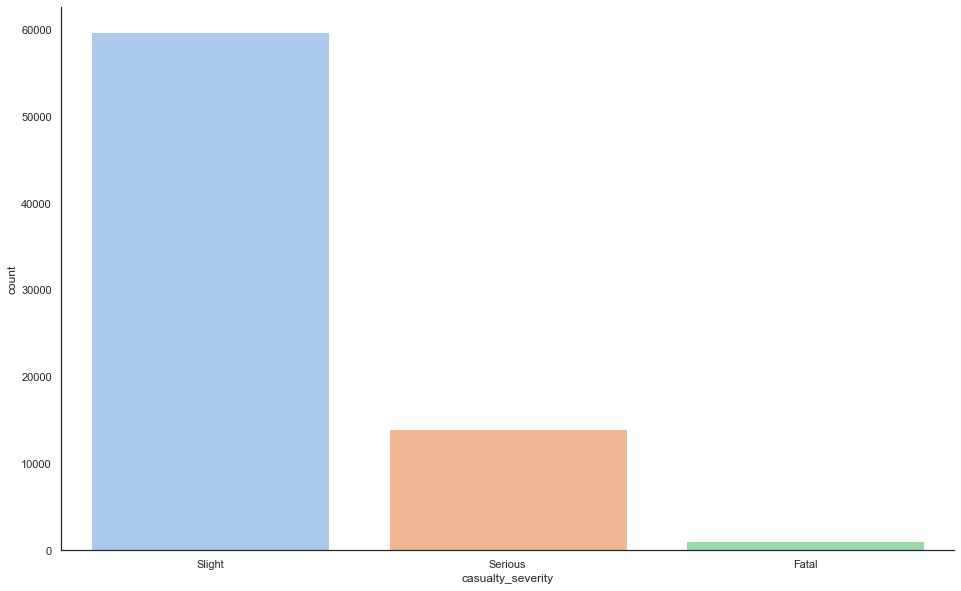

In [ ]:
sns.set_palette("pastel")
sns.set_style("white")
sns.countplot(x="casualty_severity", data=train_frame)
sns.despine()

**Imbalanced data** :A dataset with imbalanced data is one in which the target class has an unequal number of observations, We can see it clearly  on this graph ploted above. one class label has a large number of observations while the other has a small number.

Here we can see that Slight is high compared to serious and fatal. For our business problem we need to address issue related to the fatal and serious variables. For this reason we are using confusion matrix to understand the accuracy of each category rather than whole accuracy of the model

## **3.3 Checking the null values**

**3.3.1 Checking the trainset data for null values**

In [ ]:
train_frame.isna().sum()

vehicle_reference          0
casualty_reference         0
casualty_class             0
sex_of_casualty            0
age_of_casualty            0
longitude                  0
latitude                   0
number_of_casualties       0
casualty_severity          0
car_passenger              0
speed_limit                7
junction_detail            0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
urban_or_rural_area        0
accident_severity          0
police_presence            0
dtype: int64

**3.3.2 Checking the testset data for null values**

In [ ]:
test_frame.isna().sum()

vehicle_reference          0
casualty_reference         0
casualty_class             0
sex_of_casualty            0
age_of_casualty            0
longitude                  0
latitude                   0
number_of_casualties       0
casualty_severity          0
car_passenger              0
speed_limit                2
junction_detail            0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
urban_or_rural_area        0
accident_severity          0
police_presence            0
dtype: int64

## **3.4 Replacing the null values**

Here the null values are found on the speed limit so replacing it with median value will more ideal as median represents the identity value of the whole column

In [ ]:
train_frame["speed_limit"].fillna(train_frame["speed_limit"].mean(), inplace=True)
test_frame["speed_limit"].fillna(train_frame["speed_limit"].mean(), inplace=True)

# **4.0 Building the Models**

## **4.1 Encoding the Dataset**

Data science often involves categorical feature encoding, which can be accomplished in various ways, creating different results and understandings of input data. We have checked our dataset and understood that it contains floats and objects.

Since math is generally performed with numbers, categorical data is encoded numerically. For model training, mathematical inputs are required.Our NLP class taught us that converting text to numbers is a big part of natural language processing. Our algorithms are not able to operate if data is not numerical. 

By encoding a categorical feature in a one-hot manner, we can determine if there exists a unique value for that feature. We need to encode the following columns
**'vehicle_reference', 'casualty_class',
                            'sex_of_casualty', 'longitude', 'latitude',
                            'number_of_casualties', 'casualty_severity', 'car_passenger',
                            'junction_detail', 'light_conditions',
                            'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
                            'police_presence'**

In [ ]:
def enocder(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [ ]:
features_to_onehotencode= ['vehicle_reference', 'casualty_class',
                            'sex_of_casualty', 'longitude', 'latitude',
                            'number_of_casualties', 'accident_severity', 'car_passenger',
                            'junction_detail', 'light_conditions',
                            'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area',
                            'police_presence']

for feature in features_to_onehotencode:
    train_frame = enocder(train_frame, feature)
    test_frame = enocder(test_frame, feature)

In [ ]:
train_frame.head()

,casualty_reference,age_of_casualty,casualty_severity,speed_limit,casualty_class_Driver,casualty_class_Passenger,casualty_class_Pedestrian,sex_of_casualty_Female,sex_of_casualty_Male,accident_severity_Fatal,...,road_surface_conditions_Dry,road_surface_conditions_Flood,road_surface_conditions_Frost,road_surface_conditions_Snow,road_surface_conditions_Wet,urban_or_rural_area_Rural,urban_or_rural_area_Urban,police_presence_No,police_presence_Self rep only,police_presence_Yes
0,1,6,Slight,30.0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1,8,Slight,20.0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2,1,47,Slight,30.0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
3,1,2,Slight,60.0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
4,1,50,Slight,60.0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


New columns are created accodring the different values of the previous dataframe column. If we check the dataframe we can see the new coloumns formed represeenting the variable category

For example Variable **sex_0f_casualty** is changed to **sex_of_casualty_Male** and **Sex_of_casualty_Female** and rows has value of **1 and 0**

In [ ]:
train_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74759 entries, 0 to 74758
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   casualty_reference                          74759 non-null  int64  
 1   age_of_casualty                             74759 non-null  int64  
 2   casualty_severity                           74759 non-null  object 
 3   speed_limit                                 74759 non-null  float64
 4   casualty_class_Driver                       74759 non-null  uint8  
 5   casualty_class_Passenger                    74759 non-null  uint8  
 6   casualty_class_Pedestrian                   74759 non-null  uint8  
 7   sex_of_casualty_Female                      74759 non-null  uint8  
 8   sex_of_casualty_Male                        74759 non-null  uint8  
 9   accident_severity_Fatal                     74759 non-null  uint8  
 10  accident_s

In [ ]:
test_frame.head()

,casualty_reference,age_of_casualty,casualty_severity,speed_limit,casualty_class_Driver,casualty_class_Passenger,casualty_class_Pedestrian,sex_of_casualty_Female,sex_of_casualty_Male,accident_severity_Fatal,...,road_surface_conditions_Dry,road_surface_conditions_Flood,road_surface_conditions_Frost,road_surface_conditions_Snow,road_surface_conditions_Wet,urban_or_rural_area_Rural,urban_or_rural_area_Urban,police_presence_No,police_presence_Self rep only,police_presence_Yes
0,1,31,Slight,60.0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1,1,41,Slight,30.0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
2,1,25,Slight,60.0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3,1,72,Slight,60.0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
4,1,25,Serious,30.0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [ ]:
test_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18690 entries, 0 to 18689
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   casualty_reference                          18690 non-null  int64  
 1   age_of_casualty                             18690 non-null  int64  
 2   casualty_severity                           18690 non-null  object 
 3   speed_limit                                 18690 non-null  float64
 4   casualty_class_Driver                       18690 non-null  uint8  
 5   casualty_class_Passenger                    18690 non-null  uint8  
 6   casualty_class_Pedestrian                   18690 non-null  uint8  
 7   sex_of_casualty_Female                      18690 non-null  uint8  
 8   sex_of_casualty_Male                        18690 non-null  uint8  
 9   accident_severity_Fatal                     18690 non-null  uint8  
 10  accident_s

## **4.2 Data spliting**

When machine learning algorithms are used to predict on data not used to train the model, the train-test split procedure is used to estimate their performance.

**Test Dataset**: Used to evaluate the fit of the machine learning model.

**Train Dataset**: Used to fit the machine learning model.

We have a large dataset with 74759 rows. So spliting the dataset in the ratio of 80:20 for trainset and testset done and imported data.

Here dataset is already randomly splitted during the group work. so creating X_train,X_test,y_train,y_test manually without shuffling.

In [ ]:
X_train = train_frame.drop("casualty_severity",axis=1)
X_test = test_frame.drop("casualty_severity",axis=1)

y_train = train_frame["casualty_severity"]
y_test = test_frame["casualty_severity"]

## **4.3 Model Training**

### **4.3.1 Baseline Method**


The baseline is created by using heuristics, simple summary statistics, or randomness to predict the outcomes of a dataset. These predictions become the metric used to evaluate the baseline (e.g., accuracy). Here we are doing the baseline to find the minimum required values for the learning models


In [ ]:
#Baseline Method
# zero rule algorithm for classification
def zero_rule_algorithm_classification(train, test):
	output_values = [row["casualty_severity"] for index,row in train.iterrows()]
	prediction = max(set(output_values), key=output_values.count)
	predicted = [prediction for i in range(len(test))]
	return predicted

predicted = zero_rule_algorithm_classification(train_frame, test_frame)
print("Accuracy:",round(metrics.accuracy_score(y_test, predicted)* 100,2),"%")

Accuracy: 79.81 %


So we need to create models that has the values greater than **79.81%**. We are making this as a bench mark for checking the accuracy of other models

### **4.3.2 Randomforest Model**

In classification and regression problems, random forests are used vastly as supervised machine learning algorithms. 

The random forest algorithm is an easy-to-use, flexible method of machine learning that produces a good result almost without tuning the hyperparameters. Random forest serves both classification and regression purposes, which is one of its main advantages. Here we have a classification problem due to fact that our traget varible has three classes.By utilizing a random subset of features for splitting each node, trees can even be made to appear more random by additionally using random thresholds for each feature rather than looking for the best threshold possible.

Random state is given zero for avaoiding model accuracy change during different runs of the model. We need to get a uniform accuracy value.

1st line initialise the model and during the running of second line model learns the data.



In [ ]:
# Training the model
random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Here verifying model with an unseen testdata and storing the value to **y_pred**

In [ ]:
# Testing the model
y_pred=random_forest_classifier.predict(X_test)

#### **4.3.2.1 Model evaluation - Random Forest**

In [ ]:
# Model evaluvation
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)* 100,2),"%")

Accuracy: 93.3 %


#### **4.3.2.2 Checking the Precision, Recall, F1-Score - Random Forest**

We have a very high accuracy but we have to check the model in depth due to the fact that our dataset is unbalanced. For that we need to check **Precision,Recall and F1 Score**

**Precision** = The precision value of a good classifier should be quite high, preferably 1. Precision becomes 1 only if the numerator and denominator are equal, TP = TP + FP, so FP is zero. As FP is increased, the value of the denominator becomes greater than the numerator, reducing precision.

**Recall** = An ideal recall is 1 (high) for a good classifier. Recall becomes 1 only when the denominator and the numerator are equal. As FN increases, the numerator becomes greater than denominator and the recall gradually decreases.

**F1 Score** = A high F1 score can only be achieved when both precision and recall ratios are high. The F1 score is a better measure than accuracy because it is the harmonic mean of precision and recall.

By checking we will be knowing more about the fatal, serious and slight

In [ ]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

       Fatal   0.720779  0.816176  0.765517       272
     Serious   0.808522  0.866933  0.836709      3502
      Slight   0.969440  0.950657  0.959957     14916

    accuracy                       0.933012     18690
   macro avg   0.832914  0.877922  0.854061     18690
weighted avg   0.935670  0.933012  0.934034     18690



Predicted,Fatal,Serious,Slight,All
Actual,,,,
Fatal,222,24,26,272
Serious,45,3036,421,3502
Slight,41,695,14180,14916
All,308,3755,14627,18690


When we check the precision values of slight it is **0.96** but that of Fatal is **0.72**, Also the values are in similar pattern in Recall. Recall value is more vital when it comes to categorical values.

so we understand that fatal cases is less accuratly predicated compared to slight

#### **4.3.2`.3 Confusion Matrix - Random Forest**

The confusion matrix allows us to visualize the performance of our machine learning model. Having this visualization makes it easier for us to understand how it is performing.

In our case even though the accuracy is 93.3% but model may have a chance of failure as the target variable distribution is not uniform. ie percentage of fatal is less compared to the serious and slight. NHS needs to know the severity of the accident correctly so that they can provide the care accordingly.

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred)

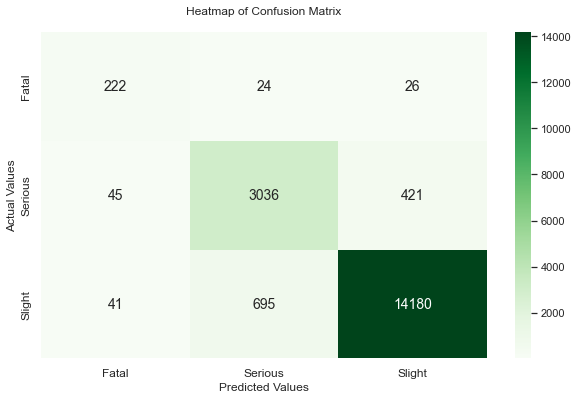

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred)
# set seaborn heatmap title, x-axis, y-axis label and font size
plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 14}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values")
ax.xaxis.set_ticklabels(random_forest_classifier.classes_,fontsize=12) 
ax.yaxis.set_ticklabels(random_forest_classifier.classes_,fontsize=12);
sns.set(font_scale=1) # set fontsize 2

Here we are getting a very good accuracy but due to the unbalanced data we need to check the other models as well. We need to check the precision value and recall value of each models to get the best model.

### **4.3.3 Decision Tree**

Using a Decision Tree as a training model is the process of learning simple decision rules inferred from the training data to predict the value of a target variable. Feature-based decision trees can be used for both classifications and regressions. Their name implies that they use flowchart-like structures to represent the predictions they produce. They start with a root node and end with a decision made by leaves


Here also we use **random state =0** for avioding the situvation of value change arbitrarily




In [ ]:
decisionTree = DecisionTreeClassifier(random_state=0)

In [ ]:
# Training the model
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

Checking the model with testset

In [ ]:
# Testing the model
y_pred=decisionTree.predict(X_test)

#### **4.3.3.1 Model evaluation - Decision Tree**

In [ ]:
# Model evaluvation
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)* 100,2),"%")

Accuracy: 92.79 %


#### **4.3.3.2 Checking the Precision, Recall, F1-Score - Decision Tree**


Checking the **Precision, Recall and F1-score** to understandd the model effectives in the fatal,slight and serious

In [ ]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

       Fatal   0.744604  0.761029  0.752727       272
     Serious   0.806345  0.834666  0.820261      3502
      Slight   0.961182  0.952869  0.957008     14916

    accuracy                       0.927929     18690
   macro avg   0.837377  0.849522  0.843332     18690
weighted avg   0.929018  0.927929  0.928412     18690



Predicted,Fatal,Serious,Slight,All
Actual,,,,
Fatal,207,31,34,272
Serious,39,2923,540,3502
Slight,32,671,14213,14916
All,278,3625,14787,18690


#### **4.3.3.3 Confusion Matrix - Decision Tree**

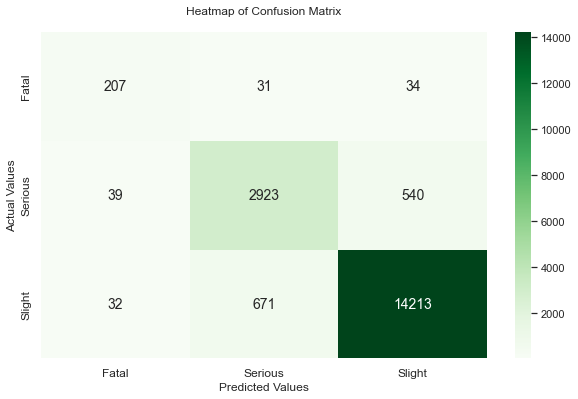

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred)
# set seaborn heatmap title, x-axis, y-axis label and font size
plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 14}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values")
ax.xaxis.set_ticklabels(random_forest_classifier.classes_,fontsize=12) 
ax.yaxis.set_ticklabels(random_forest_classifier.classes_,fontsize=12);
sns.set(font_scale=1) # set fontsize 2

### **4.3.4 Support Vector Machine**

The SVM classifier is an approach that best separates two classes (hyper-plane and line) on the basis of support vectors. However, in our scenario we have three classes which can be solved by modifying the SVM algorithm using a one vs one approach.
In multi-class classification, One-vs-All or OvA are heuristic methods for using binary classification algorithms. One-vs-rest (OvR) is a method for using binary classification algorithms. In this method, the multiclass dataset is split into multiple binary classification problems, and a binary classifier is trained on each of those binary classification problems. Predictive models are then made using the most confident model.

In [ ]:
SVM = svm.SVC(decision_function_shape='ovo',kernel='poly')
SVM.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [ ]:
y_pred = SVM.predict(X_test)

In [ ]:
np.unique(y_pred)

array(['Fatal', 'Serious', 'Slight'], dtype=object)

#### **4.3.4.1 Model evaluation - SVM**

In [ ]:
# Model evaluvation
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)* 100,2),"%")

Accuracy: 91.94 %


In [ ]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

       Fatal   0.693227  0.639706  0.665392       272
     Serious   0.787159  0.833238  0.809544      3502
      Slight   0.956489  0.944690  0.950553     14916

    accuracy                       0.919369     18690
   macro avg   0.812292  0.805878  0.808496     18690
weighted avg   0.920930  0.919369  0.919982     18690



Predicted,Fatal,Serious,Slight,All
Actual,,,,
Fatal,174,0,98,272
Serious,41,2918,543,3502
Slight,36,789,14091,14916
All,251,3707,14732,18690


#### **4.3.4.2 Confusion Matrix - SVM**

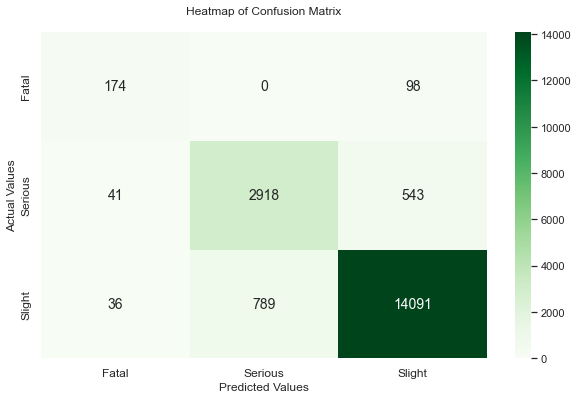

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred)
# set seaborn heatmap title, x-axis, y-axis label and font size
plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 14}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values")
ax.xaxis.set_ticklabels(SVM.classes_,fontsize=12) 
ax.yaxis.set_ticklabels(SVM.classes_,fontsize=12);
sns.set(font_scale=1) # set fontsize 2

## **4.3.5 Hyperparameter Tuning**


Hyperparameters are used either to enhance the performance and predictive power of a model or to accelerate its execution.As part of the hyperparameters, the number of decision trees and the number of features they consider when splitting nodes in the forest are included. 


In our model training Random Forest has the highest accuracy **93.30%** and showed the best performance in classifying the fatal class. So conducting Hyperparameter tuning inside Random forest.

Reason for choosing random forest is explanined in detail at the conclusion part

### **4.3.5.1 Hyperparameter Tuning - Random Forest**

Here we are using **200 and 300** as the n_estimators and avoided using the **600** due to the hardware restrictions. n_estimator represents the count of elseif used for the model

Also max_features are done using **auto and sqrt**

Here four models of Random forest are created **200_auto, 200_sqrt, 300_auto, 300_sqrt**

In [ ]:
# Number of trees in random forest
n_estimators = [200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }

print(random_grid)

{'n_estimators': [200, 300], 'max_features': ['auto', 'sqrt']}


**Here the fold is limited to 5, Becauase of the hardware restrictions**

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

warnings.filterwarnings('ignore')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Anupriya Sebastian\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
rf_random.best_params_

{'n_estimators': 300, 'max_features': 'auto'}

Here we found that our model gets the best results using the combination of **300 with sqrt**. Use these values to train the model and then we run it on our unseen test data to get the accuracy.

In [ ]:
tunedrf = RandomForestClassifier( max_features =  'sqrt', n_estimators = 300)
tunedrf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [ ]:
# Testing the model
y_pred=tunedrf.predict(X_test)

In [ ]:
# Model evaluvation
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)* 100,2),"%")

Accuracy: 93.34 %


In [ ]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

       Fatal   0.714744  0.819853  0.763699       272
     Serious   0.809372  0.868075  0.837696      3502
      Slight   0.969977  0.950858  0.960322     14916

    accuracy                       0.933440     18690
   macro avg   0.831364  0.879595  0.853906     18690
weighted avg   0.936169  0.933440  0.934484     18690



Predicted,Fatal,Serious,Slight,All
Actual,,,,
Fatal,223,24,25,272
Serious,48,3040,414,3502
Slight,41,692,14183,14916
All,312,3756,14622,18690


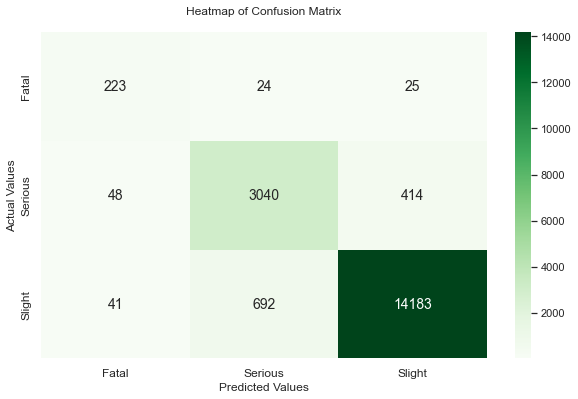

In [ ]:
matrix_confusion = confusion_matrix(y_test, y_pred)
# set seaborn heatmap title, x-axis, y-axis label and font size
plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 14}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values")
ax.xaxis.set_ticklabels(SVM.classes_,fontsize=12) 
ax.yaxis.set_ticklabels(SVM.classes_,fontsize=12);
sns.set(font_scale=1) # set fontsize 2

## **4.3.6 Feature importance**

By using Sklearn's random forest library, we will be able to determine what features are most important to predict the casualty severity. We will plot in ascending order so we know which features are most important. The random forest algorithm has another advantage in that it makes it very easy to measure how important each feature is to the prediction. By looking at what's important to the prediction process, you can decide what features to look for getting more accurate results of ML model. 

Here important fearures are **Speed_limit, accident_severity amd age_of_casualty**. In practical case also speed,age, and accident impact are important cause for deciding the persons medical codition due to accident. **accident_severity** is most important variable as per the analysis


<AxesSubplot:>

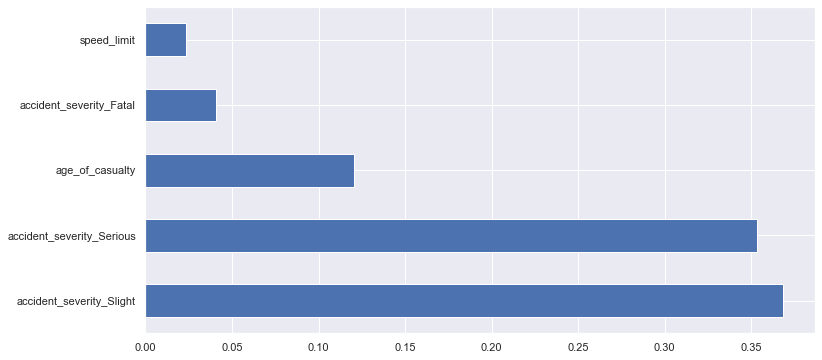

In [ ]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(tunedrf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')

# **5.0 Conclusion and Discussion of Results**


All models correctly predicted the data and the model accuracy was high as a result of the best practices we used for data cleaning, transformation and understanding. All machine learning models were trained successfully. Among the models we can comparee the accuracy values as follows 
![image-2.png](attachment:image-2.png)
As a result of comparing the accuracy, we conclude that Random Forest is the best model. Normally random forest performance better for the catergorical values. This ability outperformed SVM and Decisio tree models.

We need to compare the Precision, Recall, and F1-score to make the final decision due to the unbalanced data set
![image-3.png](attachment:image-3.png)
We can see that the Recall value of the Random forest is **0.82** and precision is **0.72**. From these results we can finalise that the **random forest** model is the **best model**

If we could find a dataset with more values of **fatal** in the Casualty_Severity column, then we would get better results with the models and you would not have to deal with the issue of unbalanced data.




# **6.0 Future Model Improvements and Business Scenario**

A model like ours can help the NHS improve their service. It can predict the severity of causalities in an accident. At present, the NHS measures casualty severity manually, and manual inputs are often biased. It clearly depends on the individual. Gender, age, status, and many other factors are taken into consideration by some people. But ML models are not biased and we are getting an accuracy of 93.31%. We can avoid human error by using this model and help the NHS to gauge the severity of casualties.


In future we can use this model to predict the casualty severity and notify the nearby hospitals about the accident. During the accident treatment main delays happens for the preparation of the operation theatre (OT). It is important for the doctor or medical staff to be informed as soon as possible about the casualty severity in order to start preparations for OT. During an accident, seconds can make a difference to the life and recovery of the person involved. Our Machine Learning model can predict this from the variables of the accident situation. Informing the hospitals of the accident, the seriousness of the casualties, and their location is important in helping the doctors provide better care. In this way, hospitals will be able to prepare their OTs and start treating patients immediately after their arrival. It has the potential to save thousands of lives if it is implemented into a proper system by a software or web application.

In [ ]:
# Finish Timer
notebook_duration = round((time.time() - start)/60, 5)
print(f'The completion of the notebook took {notebook_duration} minutes.')


The completion of the notebook took 11.56533 minutes.
